<h2 style="text-align: center;">Unsupervised Learning on the Iris Dataset</h2>



### Author :Rovina Lewis

## Objective
Given the Iris dataset, predict the optimum number of clusters using various clustering techniques

##  Data Definition
The dataset consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica.
Each sample is described by four numerical features, which represent the physical dimensions of the iris flowers.
The data definition is as follows:

**Sepal Length (cm)**: The length of the sepal of the flower.

**Sepal Width (cm):** The width of the sepal of the flower.

**Petal Length (cm):** The length of the petal of the flower.

**Petal Width (cm):** The width of the petal of the flower.



## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#load_data)**
3. **[Exploratory Data Analysis](#EDA)**
   - 3.1 - [Understand the Dataset](#Understanding_Variables)
   - 3.2 - [Distribution of Variables](#dis)
   - 3.3 - [Summary Statistics ](#stat)
4. **[K-means Clustering](#kmeans)**
    - 4.1 - [Identify the Optimal Number of Clusters](#k)
    - 4.2 - [Build the Model](#kmodel)
5.  **[Visualize the Clusters](#visual)**

<a id='import_lib'></a>
# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


<a id='load_data'></a>
# 2. Read Data


In [7]:
import pandas as pd
df=pd.read_csv(r'/Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#column id isnt that significant
df.drop('Id', axis=1, inplace=True)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id='EDA'></a>
# 3. Exploratory Data Analysis

<a id='Understanding_Variables'></a>
## 3.1 Understand the Dataset

#### Dimensions of the data

In [9]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(150, 5)

There are 150 observations and 5 columns in the dataset

#### DataFrame Structure Summary

In [10]:
#info function provides a concise summary of the DataFrame's structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<a id='dis'></a>
## 3.2 Distribution of Variables

For numerical variables  we plot the boxplot for each variable to check the distribution. Also, we can use these boxplots to identify the outliers in the variables

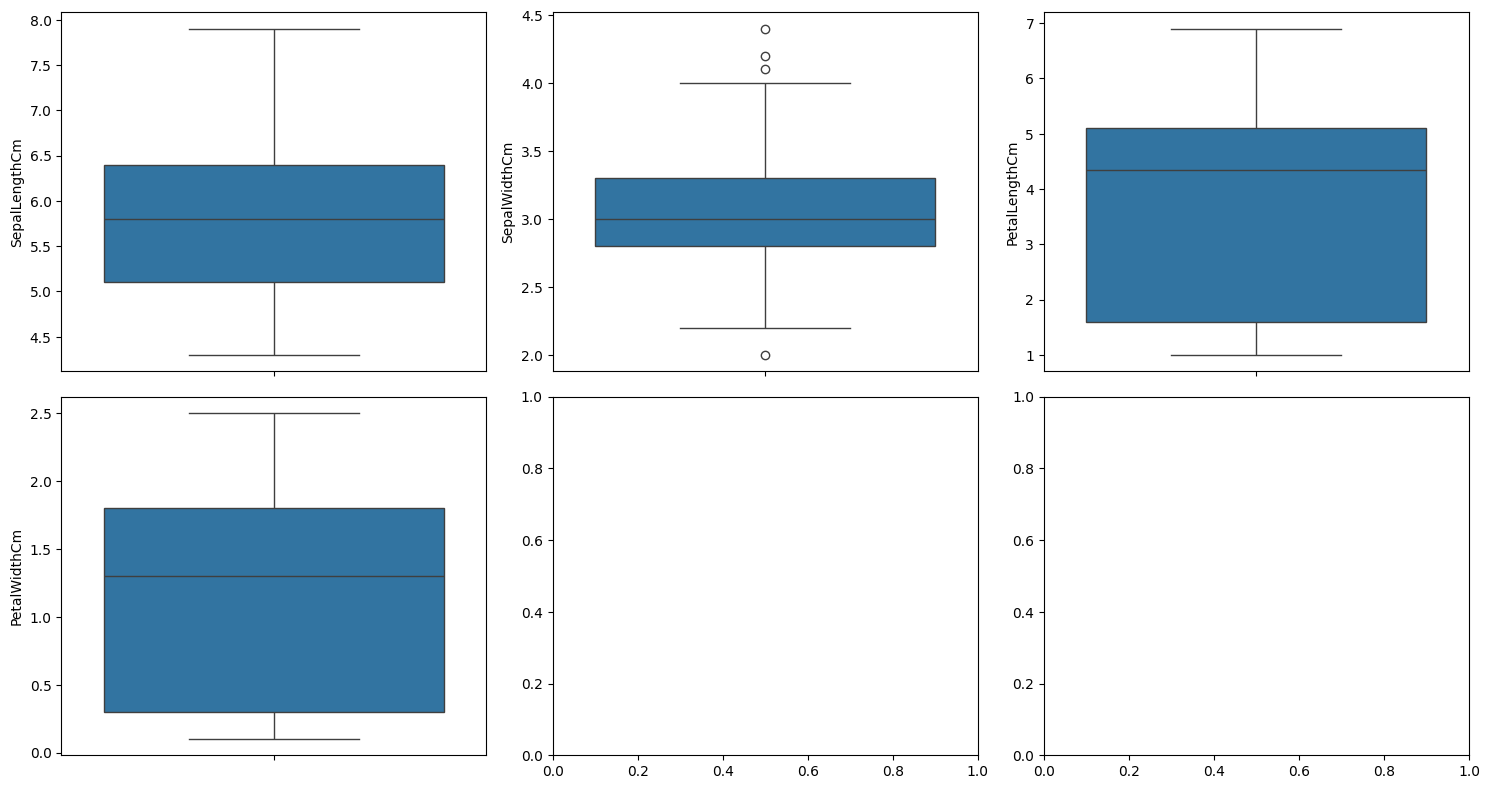

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
df2=numeric_df

# fix the size, number of rows, number of columns of subplot
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))


# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df2.columns, ax.flatten()):   #zip is used to extract variable from diff list at the same time

    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df2[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### Handling of Outliers in the Iris Dataset

Upon visualizing the Iris dataset through box plots, we observe the presence of a few outliers, particularly in the Sepal Width feature.

The Iris dataset is relatively small, and removing even a few data points could affect the quality of the analysis. The outliers present do not exhibit extreme deviation, suggesting they are part of the natural variation rather than anomalies.

In summary, while outliers are present in the Iris dataset, they have been retained in this analysis to preserve the integrity of the data and to maintain the natural variability that is key to understanding the distinct characteristics of the iris species.

<a id='stat'></a>
## 33  Summary Statistics

In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### number of unique values for each column

In [15]:
df.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [16]:

# Compute the correlation matrix
#The correlation matrix provides insights into the linear relationships between the numerical features in the dataset:
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


#### Heatmap

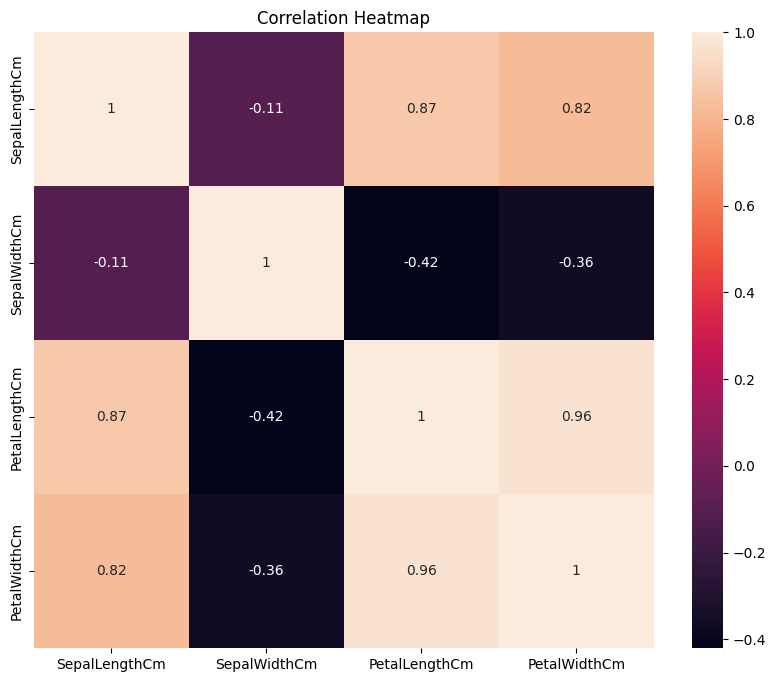

In [17]:

#The heatmap provides a visual representation of the correlation matrix, highlighting the relationships between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<a id='kmeans'></a>
# 4. K-means Clustering

K-means is the most widely-used centroid-based clustering algorithm. In this method, we need to prespecify the number of clusters to the algorithm. This method tends to build more circular clusters.

Let us first identify the optimal number of clusters and analyze the obtained clusters.

<a id='k'></a>
### 4.1 Identify the Optimal Number of Clusters

In [18]:
# Create several cluster combinations ranging from 1 to 10 and observe the SSE (Sum of Squared Errors) for each number of clusters."
# Define the range for k
k_meanclus = range(1, 11)
#consider an empty list to store the WCSS
sse = []

 # use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of sse for each K to the list 'sse'
# the 'inertia_' retuns the sse for specific value of K
for k in k_meanclus:
    km = KMeans(n_clusters=k, random_state=2)  # Initialize KMeans with the current k
    km.fit(df2)  # Fit KMeans to the numeric data
    sse.append(km.inertia_)



In [19]:
sse


[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.31116758986839,
 30.063874432733137,
 27.8792878787879,
 25.96830683643842]

Let us plot the elbow plot and identify the elbow point.

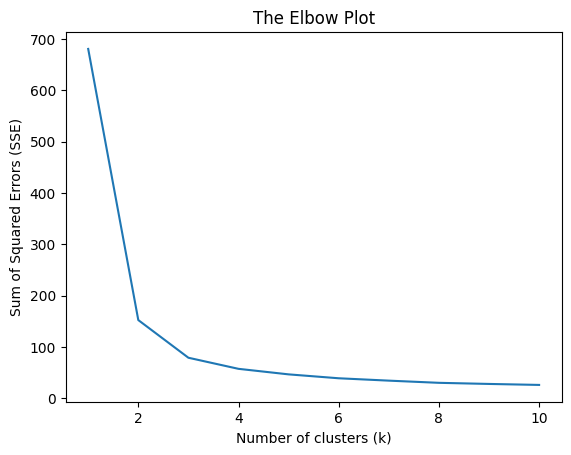

In [21]:
plt.title('The Elbow Plot')
plt.plot(k_meanclus,sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

Since the elbow point is not clearly visible, we can also use the `KneeLocator()` from the 'kneed' library in python. This function returns the point of maximum curvature (i.e. elbow/knee point).

In [25]:
# import the 'KneeLocator'
!pip install kneed
from kneed.knee_locator import KneeLocator

# pass the number of clusters and corresponding WCSS to parameters 'x' and 'y' respectively
# pass the type of the curve to the parameter 'curve'
# pass the direction of the data points to the parameter 'direction'
k = KneeLocator(x  = range(1,11), y = sse, curve = 'convex', direction = 'decreasing')

# 'elbow' returns the corresponding x-axis value at the maximum curvature
k.elbow

3

The python in-built elbow locator function returns K = 3 as the optimal value for the number of clusters.

<a id='kmodel'></a>
## 4.2 Build the Model


Let us group the dataset into 3 clusters and check the number of elements in each cluster

In [26]:
#create k means model with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=2)
kmeans.fit(df2)


KMeans(n_clusters=3, random_state=2)

In [27]:

df2['cluster']=kmeans.labels_  # add a column 'Kmeans_label' to the original dataframe
# use the 'head()' to display top five rows
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


The new column of cluster label added to the dataframe that indicates the cluster number for each observation.

#### Check the size of each cluster

In [28]:
# the 'unique()' returns the number of distinct clusters
# the 'return_counts = True' gives the number observation in each cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

We have formed three clusters, where there are 50 observartions in one cluster, and 62 and 38 observations in the other two clusters

<a id='visual'></a>
# 7. Visualize the Clusters

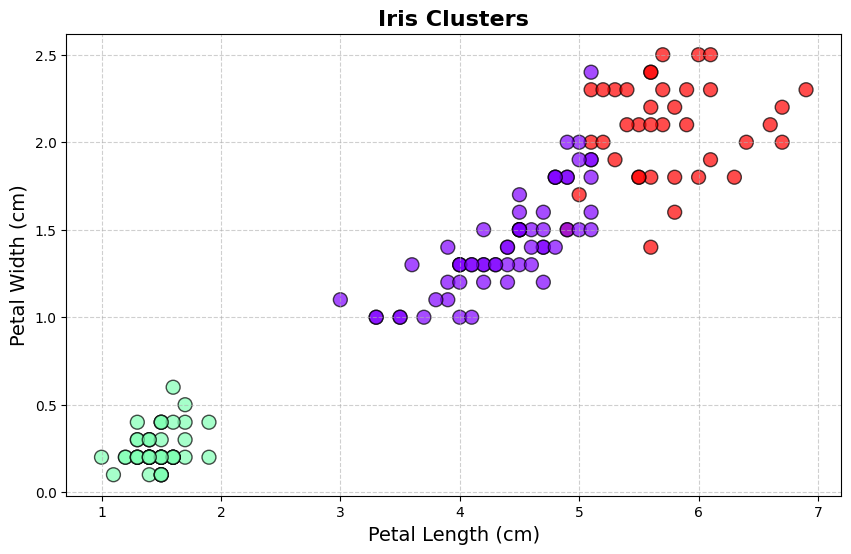

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better clarity
plt.scatter(df2['PetalLengthCm'], df2['PetalWidthCm'], c=df2['cluster'], cmap='rainbow', s=100, edgecolor='k', alpha=0.7)

# Add titles and labels
plt.title('Iris Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length (cm)', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
